# Part 5: EasyEnsemble Model Comparison (Outlier vs No Outlier)

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

from imblearn.ensemble import EasyEnsembleClassifier

from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Load Dataset

Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

In [2]:
features = ['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)',
       'iud', 'iud_(years)', 'stds_(number)',
       'stds_vulvo-perineal_condylomatosis', 'stds_number_of_diagnosis',
       'dx_cancer', 'dx_hpv', 'hinselmann']

df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = features)
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes_(years),smokes_(packs_year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,iud_(years),stds_(number),stds_vulvo-perineal_condylomatosis,stds_number_of_diagnosis,dx_cancer,dx_hpv,hinselmann
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1,1,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0,0,0,0


### Function for Visualizing Prediction Error

In [3]:
def prediction_error(X_train, y_train, X_test, y_test):
    
    classes = [1, 0]

    from yellowbrick.classifier import ClassPredictionError
    visualizer = ClassPredictionError(EasyEnsembleClassifier(random_state = 25), classes=classes)

    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)

    # Draw visualization
    visualizer.show()

## Handling Outliers

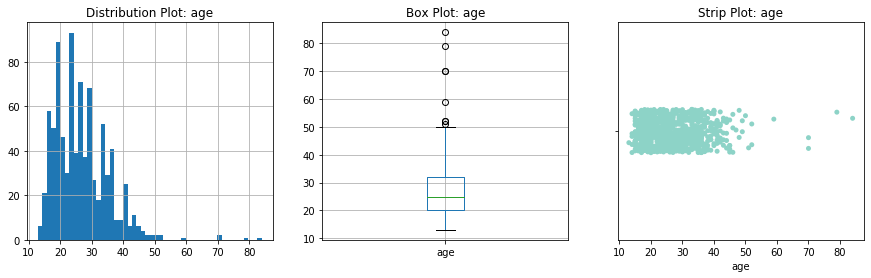

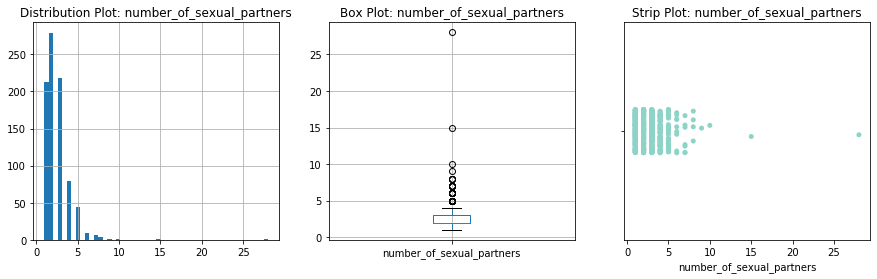

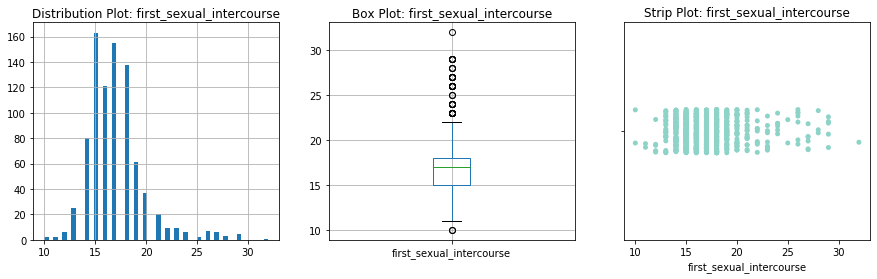

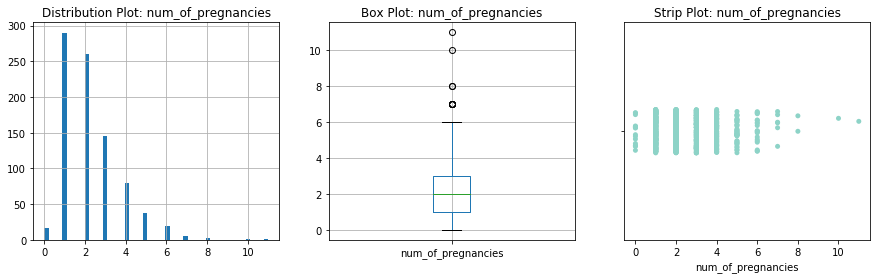

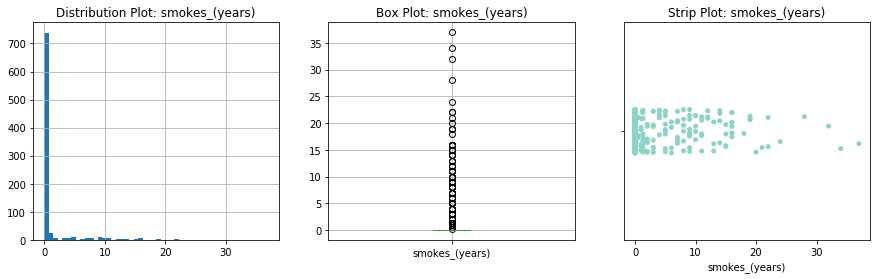

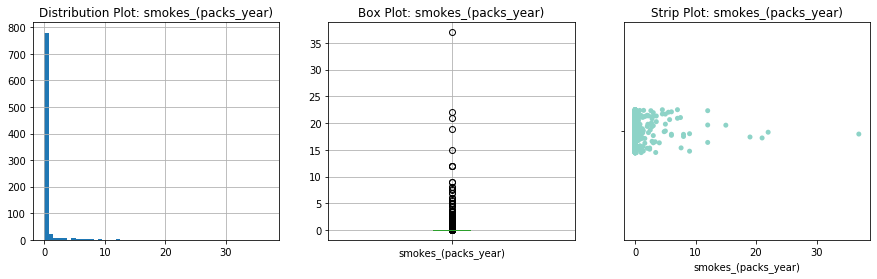

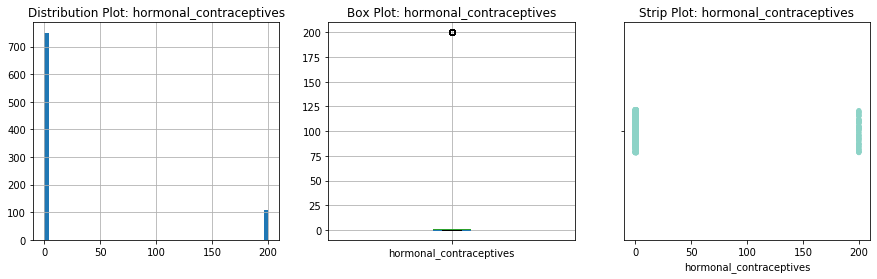

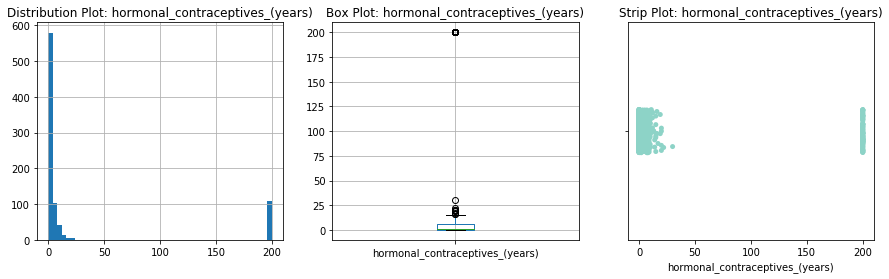

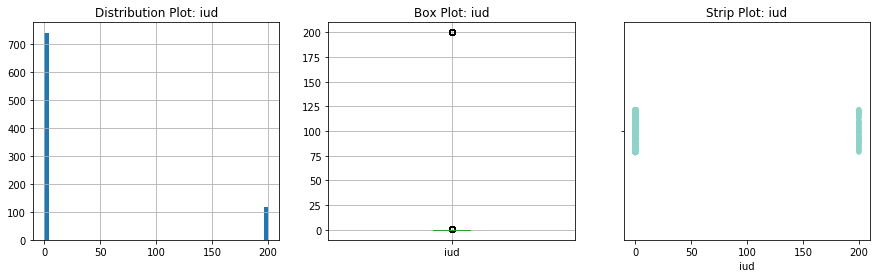

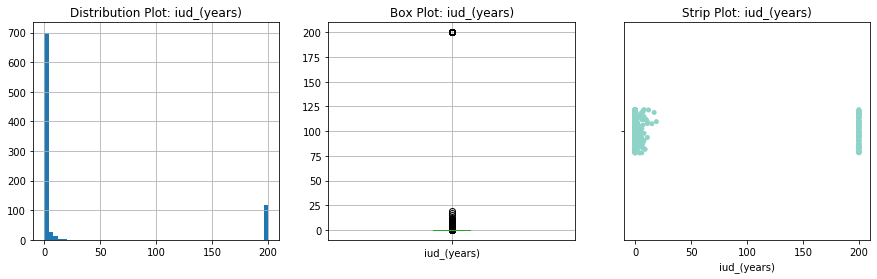

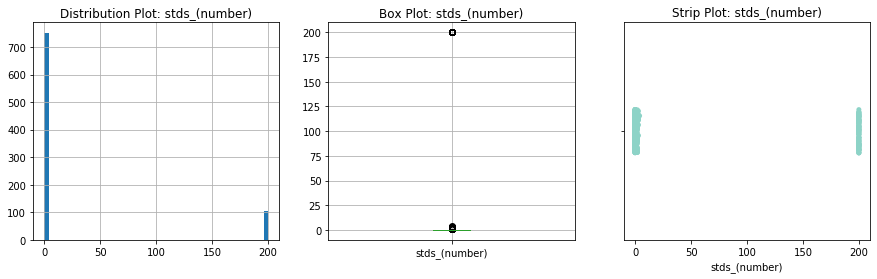

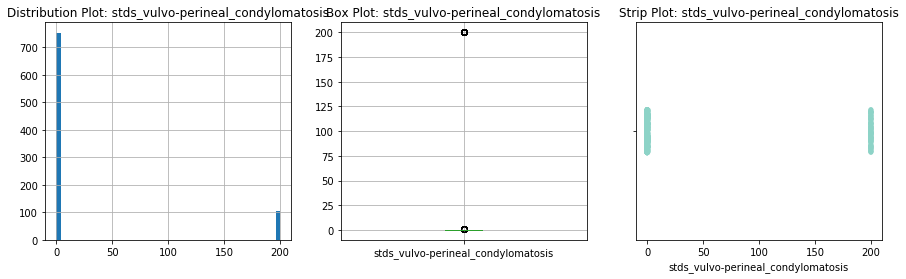

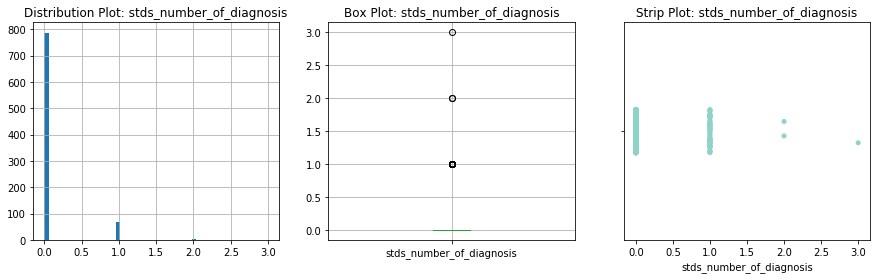

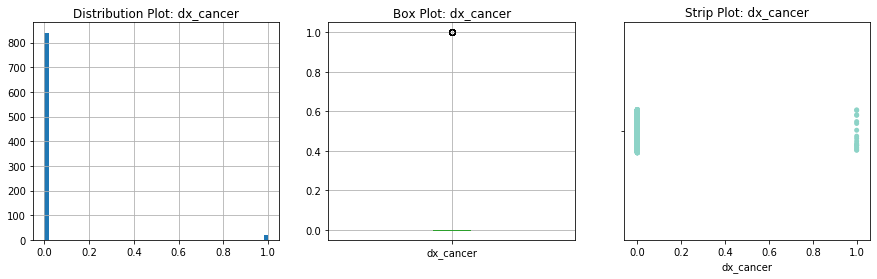

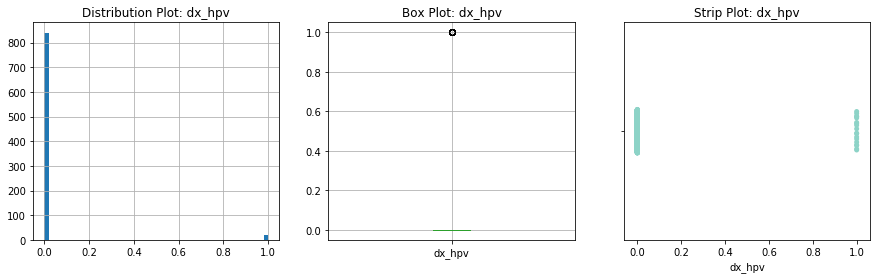

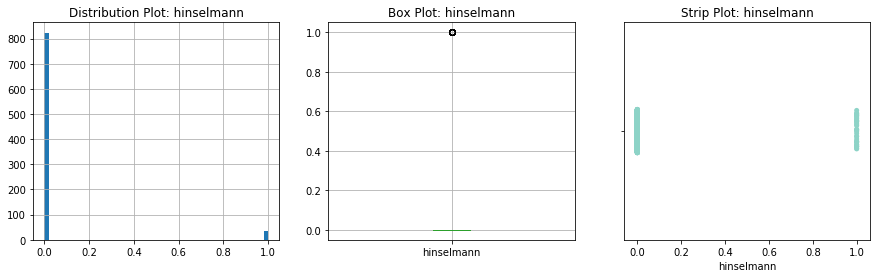

In [4]:
data = df.copy()
cols = data.columns.to_list()

for col in cols:
        
    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    data[col].hist(bins = 50)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,3,2)
    data.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))

    plt.subplot(1,3,3)
    sns.stripplot(x=data[col], palette='Set3')
    plt.title('Strip Plot: {}'.format(col))
    plt.show()

In [5]:
skewed = ['number_of_sexual_partners', 'smokes_(years)', 'smokes_(packs_year)' ]
not_skewed = ['age', 'first_sexual_intercourse', 'num_of_pregnancies' ]

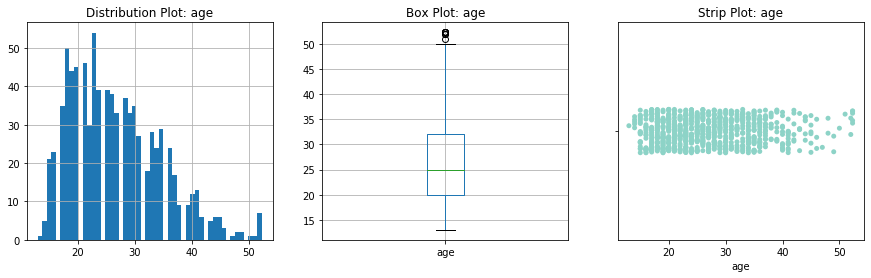

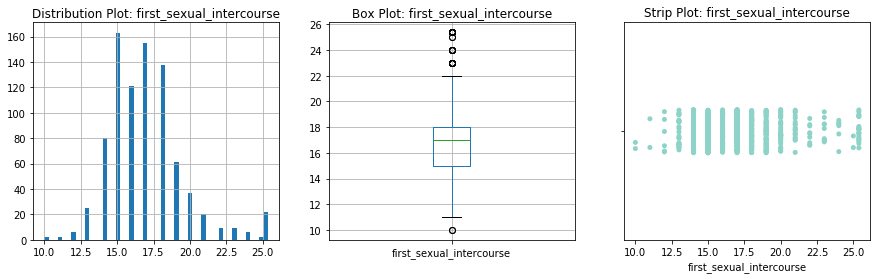

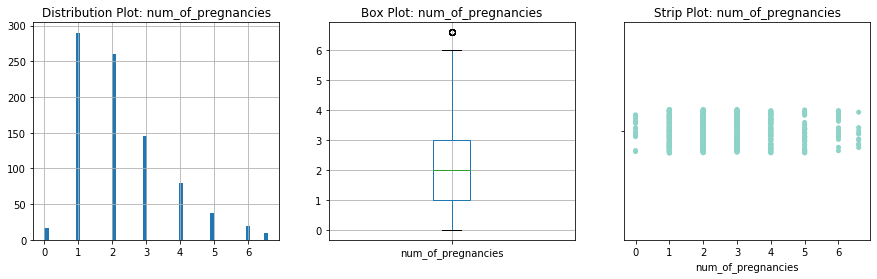

In [6]:
for col in not_skewed: 
    
    uppper_boundary = data[col].mean() + 3* data[col].std()
    lower_boundary = data[col].mean() - 3* data[col].std()

    data.loc[data[col] >= uppper_boundary, col] = uppper_boundary

    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    data[col].hist(bins = 50)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,3,2)
    data.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))

    plt.subplot(1,3,3)
    sns.stripplot(x=data[col], palette='Set3')
    plt.title('Strip Plot: {}'.format(col))
    plt.show()

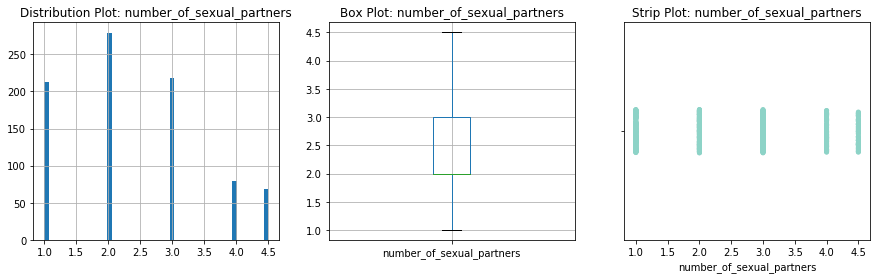

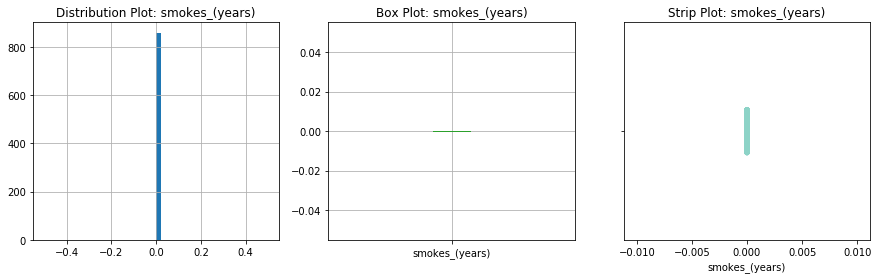

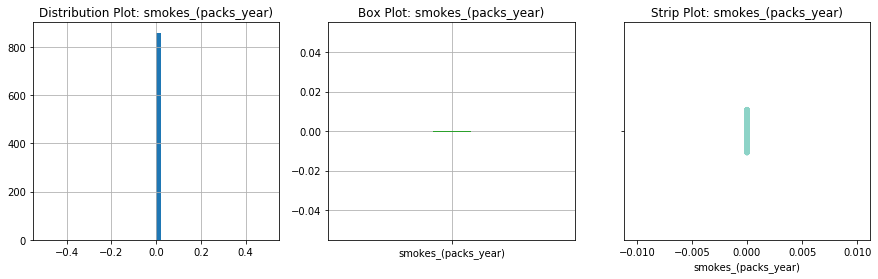

In [7]:
for col in skewed:  
        
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

    lower_bridge = data[col].quantile(0.25) - (IQR*1.5)
    upper_bridge = data[col].quantile(0.75) + (IQR*1.5)

    data.loc[data[col]>= upper_bridge, col] = upper_bridge

    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    data[col].hist(bins = 50)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,3,2)
    data.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))

    plt.subplot(1,3,3)
    sns.stripplot(x=data[col], palette='Set3')
    plt.title('Strip Plot: {}'.format(col))
    plt.show()

### Split Input and Traget Variables

In [8]:
X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_data = data.drop('hinselmann', axis = 1) 
y_data = data['hinselmann']

### Train Test Split

In [9]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.16, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (858, 16)
Shape of training dataset: (566, 15)
Shape of testing dataset: (292, 15)


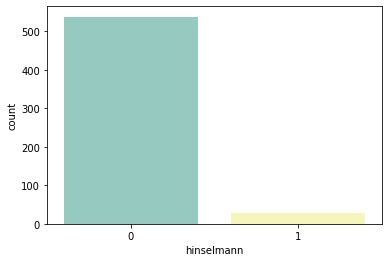

In [10]:
sns.countplot(y_train, palette='Set3')

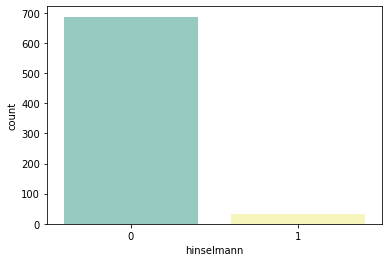

In [11]:
sns.countplot(y_train_data, palette='Set3')

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_data = sc.fit_transform(X_train_data)
X_test_data = sc.transform(X_test_data)

## Final Model (with outliers)

Recall Score: 0.8571
Macro Average of Recall Score: 0.7303
Weighted Average of Recall Score: 0.6096
------------------------------------------------------
Macro Average of Precision Score: 0.5223
Weighted Average of Precision Score: 0.9716
------------------------------------------------------
Macro Average of Recall Score: 0.4232
Weighted Average of Recall Score: 0.7354
.
Accuracy Score: 0.6096


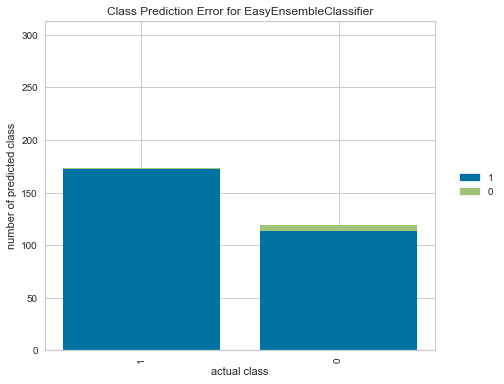

In [13]:
model = EasyEnsembleClassifier(random_state = 25)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_hat_train = model.predict(X_train)

rec = recall_score(y_test, y_hat)
print ("Recall Score:", round(rec, 4))

rec_mac = recall_score(y_test, y_hat, average = 'macro')
print ("Macro Average of Recall Score:", round(rec_mac, 4))

rec_wei = recall_score(y_test, y_hat, average = 'weighted')
print ("Weighted Average of Recall Score:", round(rec_wei, 4))

print ('------------------------------------------------------')

prec_mac = precision_score(y_test, y_hat, average = 'macro')
print ("Macro Average of Precision Score:", round(prec_mac, 4))

prec_wei = precision_score(y_test, y_hat, average = 'weighted')
print ("Weighted Average of Precision Score:", round(prec_wei, 4))

print ('------------------------------------------------------')

f1_mac = f1_score(y_test, y_hat, average = 'macro')
print ("Macro Average of Recall Score:", round(f1_mac, 4))

f1_wei = f1_score(y_test, y_hat, average = 'weighted')
print ("Weighted Average of Recall Score:", round(f1_wei, 4))

print('.')

acc = accuracy_score(y_test, y_hat)
print ("Accuracy Score:", round(acc, 4))

prediction_error(X_train, y_train, X_test, y_test)

In [14]:
acc_train = metrics.accuracy_score(y_train, y_hat_train)
print ("Accuracy Score of Train Set:", acc_train)
    
acc_test = metrics.accuracy_score(y_test, y_hat)
print ("Accuracy Score of Test Set:", acc_test)
    
print ('.')
    
f1_train = metrics.f1_score(y_train, y_hat_train, average = 'macro')
print ("F1 Score of Train Set:", f1_train)
    
f1_test = metrics.f1_score(y_test, y_hat, average = 'macro')
print ("F1 Score of Test Set:", f1_test)

Accuracy Score of Train Set: 0.6413427561837456
Accuracy Score of Test Set: 0.6095890410958904
.
F1 Score of Train Set: 0.4918423578217393
F1 Score of Test Set: 0.42316489914743194


## Final Model (without outliers)

Recall Score: 1.0
Macro Average of Recall Score: 0.75
Weighted Average of Recall Score: 0.5072
------------------------------------------------------
Macro Average of Precision Score: 0.5143
Weighted Average of Precision Score: 0.9859
------------------------------------------------------
Macro Average of Recall Score: 0.3611
Weighted Average of Recall Score: 0.6578
.
Accuracy Score: 0.5072


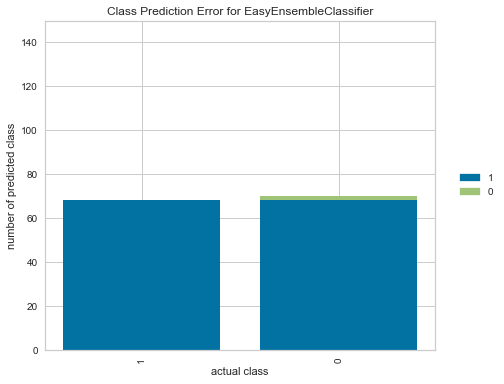

In [15]:
model = EasyEnsembleClassifier(random_state = 25)
model.fit(X_train_data, y_train_data)
y_hat_data = model.predict(X_test_data)
y_hat_train_data = model.predict(X_train_data)

rec = recall_score(y_test_data, y_hat_data)
print ("Recall Score:", round(rec, 4))

rec_mac = recall_score(y_test_data, y_hat_data, average = 'macro')
print ("Macro Average of Recall Score:", round(rec_mac, 4))

rec_wei = recall_score(y_test_data, y_hat_data, average = 'weighted')
print ("Weighted Average of Recall Score:", round(rec_wei, 4))

print ('------------------------------------------------------')

prec_mac = precision_score(y_test_data, y_hat_data, average = 'macro')
print ("Macro Average of Precision Score:", round(prec_mac, 4))

prec_wei = precision_score(y_test_data, y_hat_data, average = 'weighted')
print ("Weighted Average of Precision Score:", round(prec_wei, 4))

print ('------------------------------------------------------')

f1_mac = f1_score(y_test_data, y_hat_data, average = 'macro')
print ("Macro Average of Recall Score:", round(f1_mac, 4))

f1_wei = f1_score(y_test_data, y_hat_data, average = 'weighted')
print ("Weighted Average of Recall Score:", round(f1_wei, 4))

print('.')

acc = accuracy_score(y_test_data, y_hat_data)
print ("Accuracy Score:", round(acc, 4))

prediction_error(X_train_data, y_train_data, X_test_data, y_test_data)

In [16]:
acc_train_data = metrics.accuracy_score(y_train_data, y_hat_train_data)
print ("Accuracy Score of Train Set:", acc_train_data)
    
acc_test_data = metrics.accuracy_score(y_test_data, y_hat_data)
print ("Accuracy Score of Test Set:", acc_test_data)
    
print ('.')
    
f1_train_data = metrics.f1_score(y_train_data, y_hat_train_data, average = 'macro')
print ("F1 Score of Train Set:", f1_train_data)
    
f1_test_data = metrics.f1_score(y_test_data, y_hat_data, average = 'macro')
print ("F1 Score of Test Set:", f1_test_data)

Accuracy Score of Train Set: 0.5388888888888889
Accuracy Score of Test Set: 0.5072463768115942
.
F1 Score of Train Set: 0.4236055517510779
F1 Score of Test Set: 0.3611111111111111


## Conclusion

### We will keep the features unchanged.